## Index for crop_exploration_NUTS2.ipynb code

Description: View of tendencies in the data different variables (crops and education) for NUTS2 level regions

### 1. Preparation of the data for NUTS 2 analysis
   - Load the data
   - Add the names of the regions NUTS2 to the data

### 2. Combining all crops into one table
   - Pivot pc and tc tables
   - Combine into one total_crops table

### 3. Total crop production
   - Tables and graphs of total crop production, in total and per region

### 4. Percentage crop production
   - Table and graphs of percentage of crop production, in total and per region

### 5. Continent vs Island Production Values
   - Comparisons of production and revenue between continent and island regions

-----------------------------------------------------------------------------------------

## 1. Preparation of the data for NUTS 2 analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from region_colors import region_colors
from production_colors import production_colors


In [2]:
permcrop_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS2_2019.csv', sep=",")
tempcrop_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS2_2019.csv', sep=",")
education_df = pd.read_csv('../CSVs/Education_NUTS2_2019.csv', sep=",")
labour_df = pd.read_csv('../CSVs/Labour_NUTS2_2019.csv', sep=",")
prod_df = pd.read_csv('../CSVs/Production_NUTS2_2019.csv', sep=",")

In [3]:
dataframes = [permcrop_df, tempcrop_df, education_df, labour_df, prod_df]

for df in dataframes:
    df.replace({'Região Autónoma da Madeira ': 'Madeira', 'Região Autónoma dos Açores ': 'Açores', 'Área Metropolitana de Lisboa': 'Lisboa'}, inplace=True)

In [4]:
permcrop_df['region_name'].unique()

array(['Norte', 'Algarve', 'Centro', 'Lisboa', 'Alentejo', 'Açores',
       'Madeira'], dtype=object)

In [5]:
permcrop_df.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name
0,11,Norte,2,2019,255954,88611,Total
1,11,Norte,2,2019,13815,17257,Fresh fruit plantations (excluding citrus plan...
2,11,Norte,2,2019,1257,5221,Citrus plantations
3,11,Norte,2,2019,2619,1501,Fruit plantations (subtropical climate zones)
4,11,Norte,2,2019,73849,33765,Nuts plantations


In [6]:
tempcrop_df.head()

,NutsID,region_name,NUTS_level,tc.year,tc.area,tc.hold,tcn.crop_name
0,11,Norte,2,2019,151107,54566,Total
1,11,Norte,2,2019,38251,34891,Cereals
2,11,Norte,2,2019,1913,6615,Dried pulses
3,11,Norte,2,2019,6841,6597,Temporary grasses and grazings
4,11,Norte,2,2019,96034,28265,Fodder plants


## 2. Combining all crops into one table

In [7]:
pc_pivot = pd.pivot_table(
    data=permcrop_df,
    index='region_name',
    columns=['pcn.crop_name'],
    values='pc.area'
)
pc_pivot

pcn.crop_name,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Total,Vineyards
region_name,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,358544.0,36686.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,56754.0,1513.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,2574.0,1424.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,168086.0,42234.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,16428.0,9266.0
Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,2322.0,719.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,255954.0,81411.0


In [8]:
pc_pivot = pc_pivot[['Citrus plantations', 
                     'Fresh fruit plantations (excluding citrus plantations)', 
                     'Fruit plantations (subtropical climate zones)', 
                     'Nuts plantations', 
                     'Olive plantations', 
                     'Other permanent crops', 
                     'Vineyards', 
                     'Total']]
pc_pivot

pcn.crop_name,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Total
region_name,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,358544.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,56754.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,2574.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,168086.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,16428.0
Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,719.0,2322.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,81411.0,255954.0


In [9]:
tc_pivot = pd.pivot_table(
    data=tempcrop_df,
    index='region_name',
    columns=['tcn.crop_name'],
    values='tc.area'
)
tc_pivot

tcn.crop_name,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Sugarbeets,Temporary grasses and grazings,Total
region_name,,,,,,,,,,,
Alentejo,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,0.0,82035.0,473551.0
Algarve,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,0.0,1659.0,12120.0
Açores,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,0.0,14767.0,42822.0
Centro,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,0.0,13747.0,171887.0
Lisboa,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,0.0,1521.0,34812.0
Madeira,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,0.0,7.0,2085.0
Norte,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,0.0,6841.0,151107.0


In [10]:
# drop sugarbeets because it's not grown in any region
tc_pivot.drop(labels='Sugarbeets', axis=1, inplace=True)

In [11]:
tc_pivot.head(10)

tcn.crop_name,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Total
region_name,,,,,,,,,,
Alentejo,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0,473551.0
Algarve,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0,12120.0
Açores,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0,42822.0
Centro,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0,171887.0
Lisboa,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0,34812.0
Madeira,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,7.0,2085.0
Norte,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,6841.0,151107.0


In [12]:
# rename Total columns, so they are accurately tracked when tables are joined
tc_pivot.rename(columns={'Total': 'Total_temp_crop'}, inplace=True)
pc_pivot.rename(columns={'Total': 'Total_perm_crop'}, inplace=True)

In [13]:
total_crops = pc_pivot.join(tc_pivot, on='region_name', how='inner')

In [14]:
total_crops

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Total_perm_crop,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Total_temp_crop
region_name,,,,,,,,,,,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,358544.0,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0,473551.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,56754.0,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0,12120.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,2574.0,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0,42822.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,168086.0,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0,171887.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,16428.0,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0,34812.0
Madeira,118.0,267.0,1076.0,123.0,0.0,19.0,719.0,2322.0,34.0,0.0,45.0,77.0,814.0,180.0,456.0,473.0,7.0,2085.0
Norte,1257.0,13815.0,2619.0,73849.0,82777.0,226.0,81411.0,255954.0,38251.0,1913.0,368.0,96034.0,3634.0,164.0,113.0,3789.0,6841.0,151107.0


In [15]:
# add total crop area column
total_crops['Total_crop_area'] = total_crops['Total_perm_crop'] + total_crops['Total_temp_crop']

## 3. Total crop production

In [16]:
total_crops[['Total_perm_crop', 'Total_temp_crop', 'Total_crop_area']]

,Total_perm_crop,Total_temp_crop,Total_crop_area
region_name,,,
Alentejo,358544.0,473551.0,832095.0
Algarve,56754.0,12120.0,68874.0
Açores,2574.0,42822.0,45396.0
Centro,168086.0,171887.0,339973.0
Lisboa,16428.0,34812.0,51240.0
Madeira,2322.0,2085.0,4407.0
Norte,255954.0,151107.0,407061.0


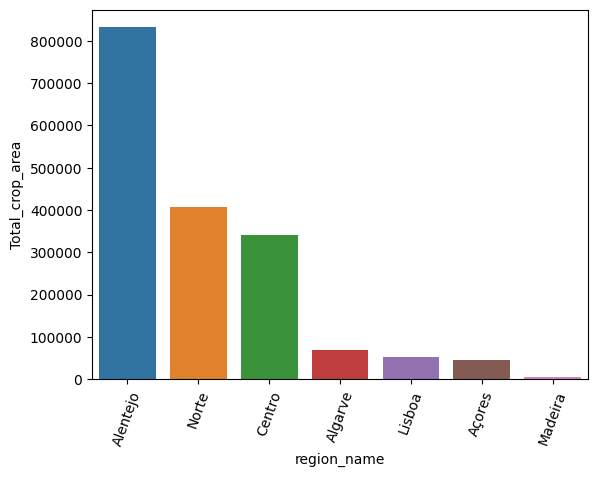

In [17]:
sorted_total_crops = total_crops.sort_values(by='Total_crop_area', ascending=False)


sns.barplot(data=sorted_total_crops[['Total_crop_area']], 
            x=sorted_total_crops.index, 
            y='Total_crop_area',
            hue=sorted_total_crops.index)

plt.xticks(rotation=70)
plt.show()

In [18]:
only_crops = total_crops.drop(['Total_crop_area', 'Total_perm_crop', 'Total_temp_crop'], axis=1)
only_crops.head()

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings
region_name,,,,,,,,,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0


In [19]:
crops_with_total = total_crops.drop(['Total_perm_crop', 'Total_temp_crop'], axis=1)
crops_with_total.head()

,Citrus plantations,Fresh fruit plantations (excluding citrus plantations),Fruit plantations (subtropical climate zones),Nuts plantations,Olive plantations,Other permanent crops,Vineyards,Cereals,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh vegetables,Industrial crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Total_crop_area
region_name,,,,,,,,,,,,,,,,,
Alentejo,2260.0,5926.0,380.0,107298.0,205363.0,630.0,36686.0,138011.0,13185.0,707.0,199160.0,26614.0,9650.0,1438.0,2752.0,82035.0,832095.0
Algarve,13951.0,3744.0,1937.0,26179.0,9409.0,21.0,1513.0,2596.0,106.0,276.0,6158.0,915.0,148.0,178.0,83.0,1659.0,68874.0
Açores,350.0,116.0,481.0,97.0,0.0,107.0,1424.0,35.0,30.0,49.0,26703.0,673.0,5.0,235.0,324.0,14767.0,45396.0
Centro,1039.0,26364.0,1032.0,17008.0,78956.0,1453.0,42234.0,46322.0,3279.0,170.0,91275.0,11597.0,303.0,934.0,4260.0,13747.0,339973.0
Lisboa,639.0,1443.0,177.0,4152.0,730.0,20.0,9266.0,9349.0,184.0,307.0,13637.0,7749.0,242.0,122.0,1702.0,1521.0,51240.0


In [20]:
# now that pc and tc are combined, melting for easier additional calculations
unpivot_only_crops = pd.melt(only_crops.reset_index(), id_vars=['region_name'], value_vars=only_crops.columns)
unpivot_only_crops.rename({'variable': 'crop_name', 'value': 'area'}, axis=1, inplace=True)
unpivot_only_crops.head()

,region_name,crop_name,area
0,Alentejo,Citrus plantations,2260.0
1,Algarve,Citrus plantations,13951.0
2,Açores,Citrus plantations,350.0
3,Centro,Citrus plantations,1039.0
4,Lisboa,Citrus plantations,639.0


In [21]:
unpivot_only_crops['crop_name'].unique()

array(['Citrus plantations',
       'Fresh fruit plantations (excluding citrus plantations)',
       'Fruit plantations (subtropical climate zones)',
       'Nuts plantations', 'Olive plantations', 'Other permanent crops',
       'Vineyards', 'Cereals', 'Dried pulses',
       'Flowers and ornamental plants', 'Fodder plants',
       'Fresh vegetables', 'Industrial crops', 'Other temporary crops',
       'Potatoes', 'Temporary grasses and grazings'], dtype=object)

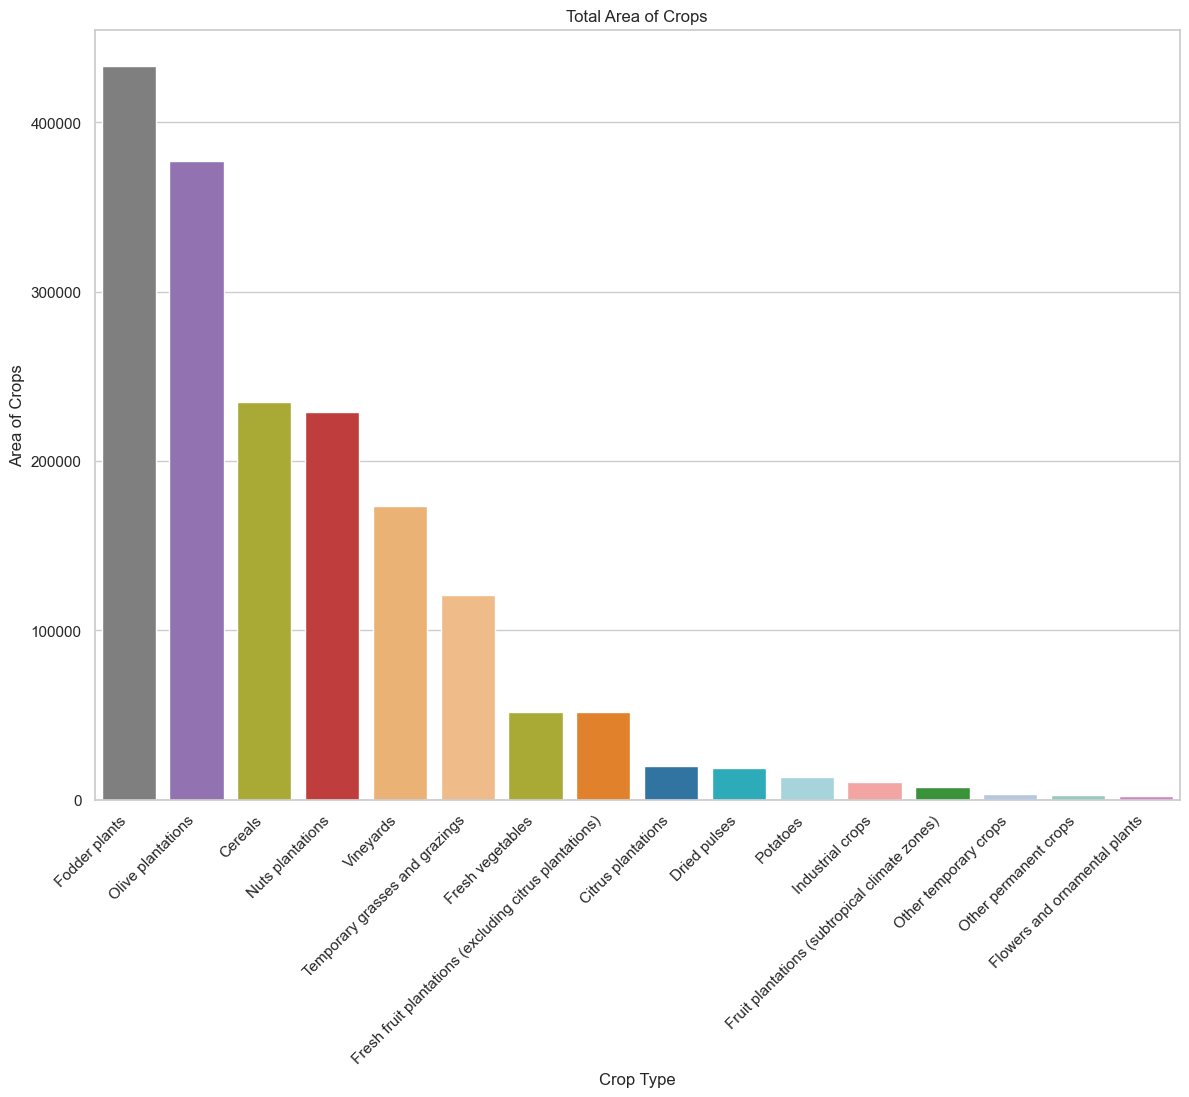

In [22]:
# Total area of crops
crops_total_area = unpivot_only_crops.groupby(['crop_name'])['area'].sum().reset_index()
ordered_total_crops = crops_total_area.sort_values(by='area', ascending=False)


# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='crop_name', y='area', hue='crop_name', data=ordered_total_crops, palette=production_colors)

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Crop Type')
plt.ylabel('Area of Crops')
plt.title('Total Area of Crops')

# Show plot
plt.show()

## 4. Percentage crop production

In [23]:
# crop percentage of region total
def crop_percentage(row):
    id = row['region_name']
    value = row['area']
    total = crops_with_total[crops_with_total.index == id]['Total_crop_area'].values[0]
    if total == 0:
        return None
    return round((value / total) * 100, 2)

unpivot_only_crops.loc[:, 'area_perc'] = unpivot_only_crops.apply(crop_percentage, axis=1)

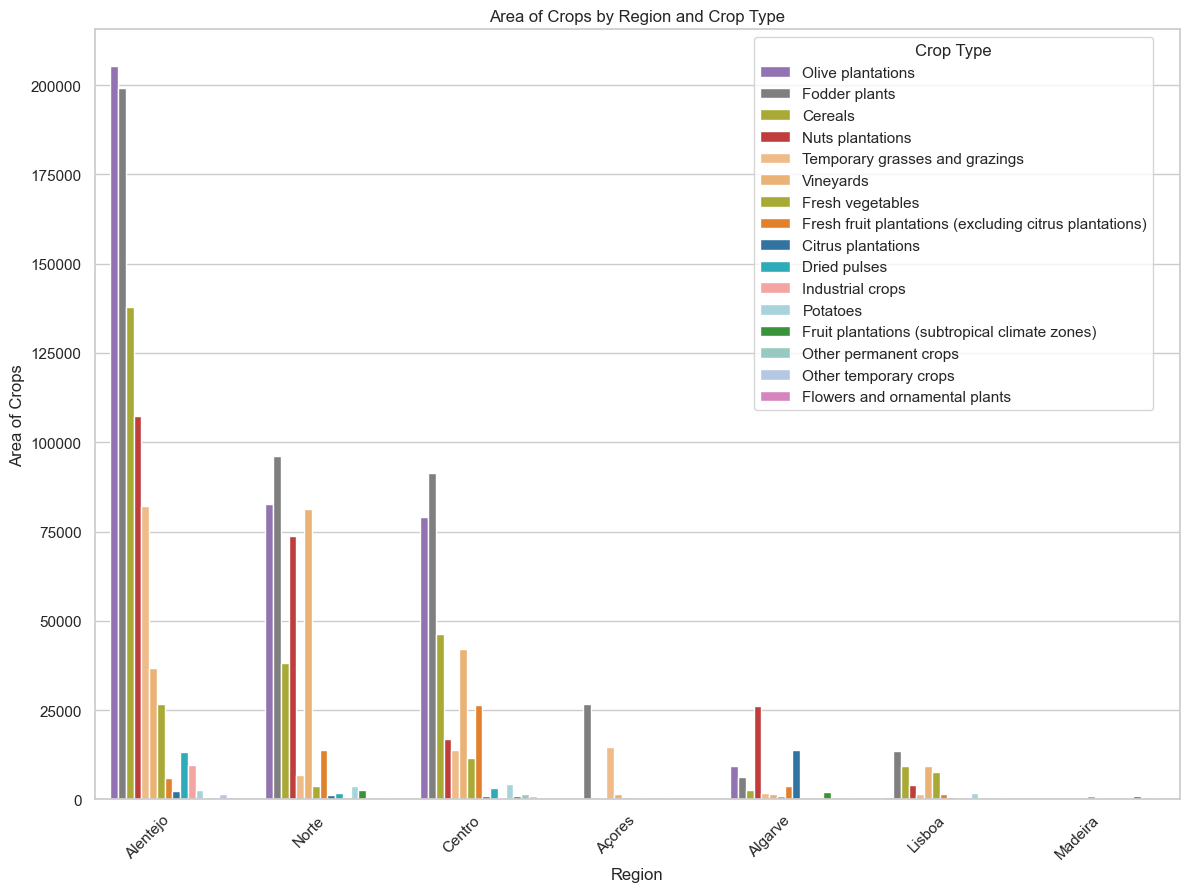

In [24]:
ordered_unpivot = unpivot_only_crops.sort_values(by='area', ascending=False)


# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='region_name', y='area', hue='crop_name', data=ordered_unpivot, palette=production_colors)

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Area of Crops')
plt.title('Area of Crops by Region and Crop Type')
plt.legend(title='Crop Type', bbox_to_anchor=(0.6, 1), loc='upper left')

# Show plot
plt.show()

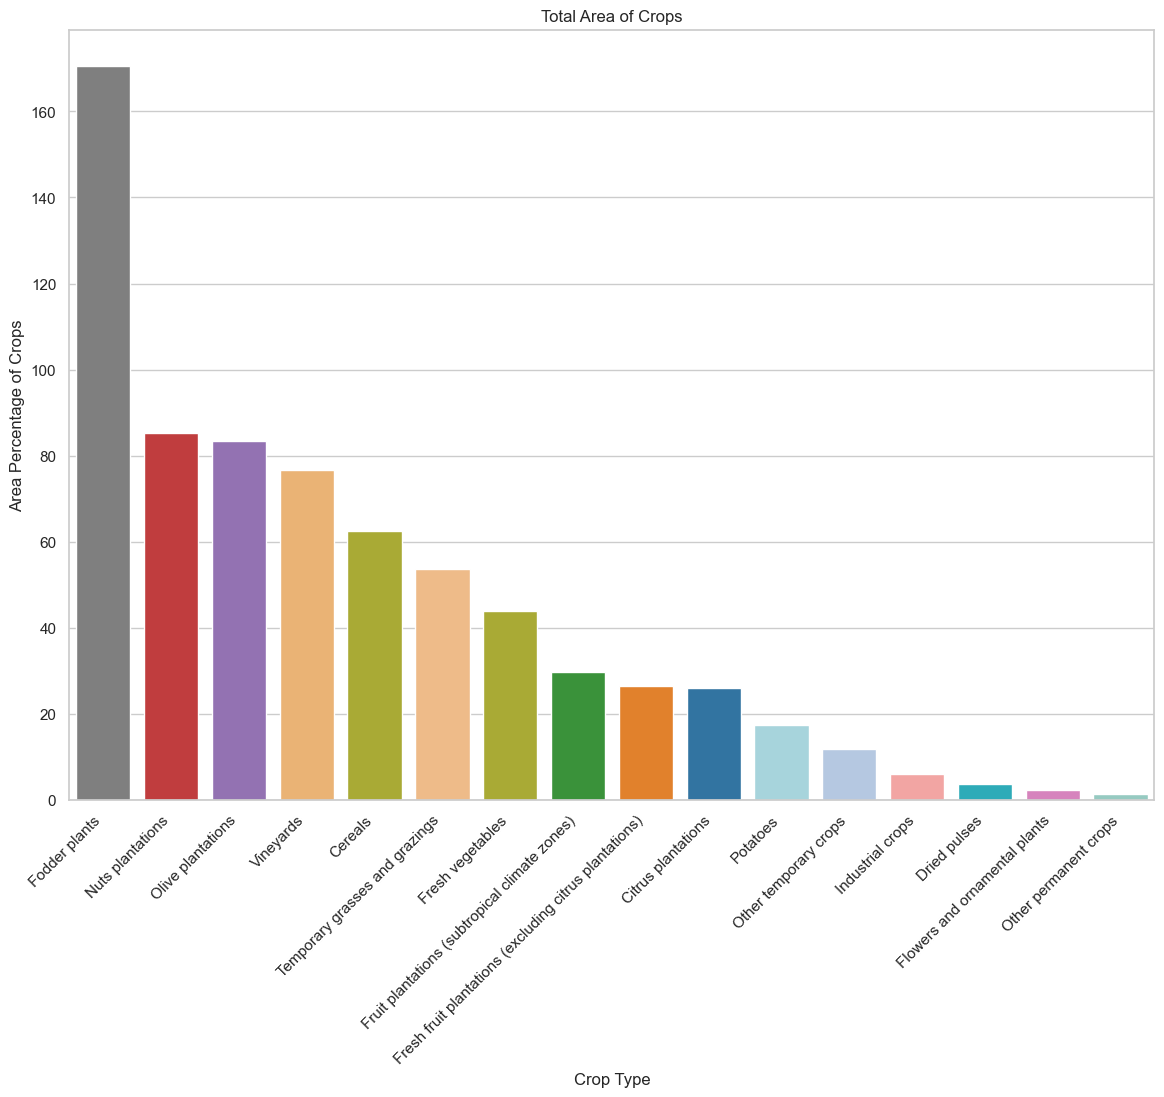

In [25]:
# Total percentage area of crops
crops_perc_total_area = unpivot_only_crops.groupby(['crop_name'])['area_perc'].sum().reset_index()
ordered_perc_total_crops = crops_perc_total_area.sort_values(by='area_perc', ascending=False)

# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='crop_name', y='area_perc', hue='crop_name', data=ordered_perc_total_crops, palette=production_colors)

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Crop Type')
plt.ylabel('Area Percentage of Crops')
plt.title('Total Area of Crops')

# Show plot
plt.show()

In [26]:
perc_pivot = pd.pivot_table(
    data=ordered_unpivot,
    index='region_name',
    columns=['crop_name'],
    values='area_perc'
)
perc_pivot

crop_name,Cereals,Citrus plantations,Dried pulses,Flowers and ornamental plants,Fodder plants,Fresh fruit plantations (excluding citrus plantations),Fresh vegetables,Fruit plantations (subtropical climate zones),Industrial crops,Nuts plantations,Olive plantations,Other permanent crops,Other temporary crops,Potatoes,Temporary grasses and grazings,Vineyards
region_name,,,,,,,,,,,,,,,,
Alentejo,16.59,0.27,1.58,0.08,23.93,0.71,3.20,0.05,1.16,12.89,24.68,0.08,0.17,0.33,9.86,4.41
Algarve,3.77,20.26,0.15,0.40,8.94,5.44,1.33,2.81,0.21,38.01,13.66,0.03,0.26,0.12,2.41,2.20
Açores,0.08,0.77,0.07,0.11,58.82,0.26,1.48,1.06,0.01,0.21,0.00,0.24,0.52,0.71,32.53,3.14
Centro,13.63,0.31,0.96,0.05,26.85,7.75,3.41,0.30,0.09,5.00,23.22,0.43,0.27,1.25,4.04,12.42
Lisboa,18.25,1.25,0.36,0.60,26.61,2.82,15.12,0.35,0.47,8.10,1.42,0.04,0.24,3.32,2.97,18.08
Madeira,0.77,2.68,0.00,1.02,1.75,6.06,18.47,24.42,4.08,2.79,0.00,0.43,10.35,10.73,0.16,16.31
Norte,9.40,0.31,0.47,0.09,23.59,3.39,0.89,0.64,0.04,18.14,20.34,0.06,0.03,0.93,1.68,20.00


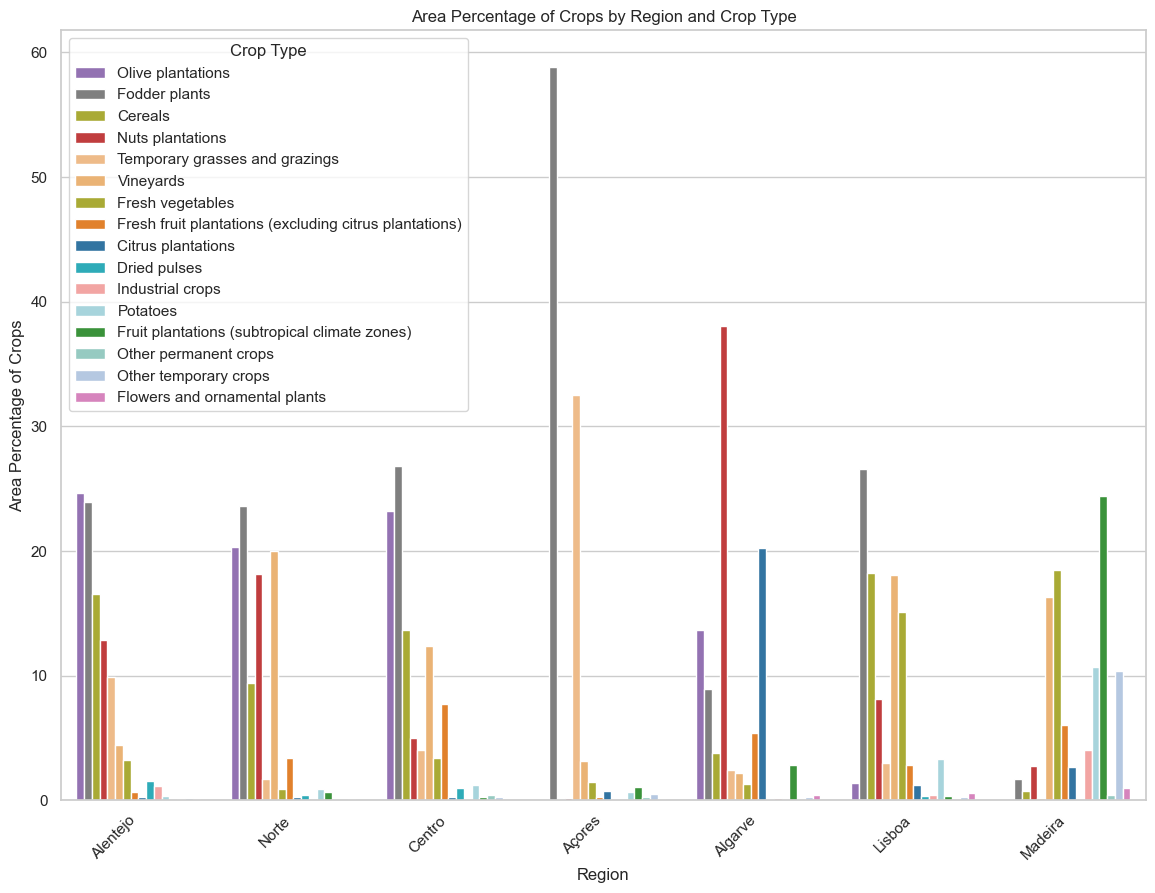

In [27]:
# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='region_name', y='area_perc', hue='crop_name', data=ordered_unpivot, palette=production_colors)

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Area Percentage of Crops')
plt.title('Area Percentage of Crops by Region and Crop Type')
plt.legend(title='Crop Type', bbox_to_anchor=(0, 1), loc='upper left')

# Show plot
plt.show()

## 5. Continent vs Island Production Values

In [28]:
# Get continent crops as percentage of total
continent_crops = unpivot_only_crops[unpivot_only_crops['region_name'].isin(['Alentejo', 'Algarve', 'Centro', 'Lisboa', 'Norte'])].copy()
continent_crops_area = continent_crops.groupby(['crop_name'])['area'].sum().reset_index()
# Calculate total area of crops on continent
continent_sum_area = continent_crops_area['area'].sum()
# Calculate area percentage
continent_crops_area['area_perc'] = round((continent_crops_area['area'] / continent_sum_area) * 100, 2)
continent_crops_area['region'] = 'Continent'

In [29]:
# Island crops as percentage of total
island_crops = unpivot_only_crops[unpivot_only_crops['region_name'].isin(['Açores', 'Madeira'])].copy()
island_crops_area = island_crops.groupby(['crop_name'])['area'].sum().reset_index()
island_sum_area = island_crops_area['area'].sum()
island_crops_area['area_perc'] = round((island_crops_area['area'] / island_sum_area) * 100, 2)
island_crops_area['region'] = 'Island'

In [30]:
crops_cont_island = pd.concat([continent_crops_area, island_crops_area])
crops_cont_island.head()


,crop_name,area,area_perc,region
0,Cereals,234529.0,13.80,Continent
1,Citrus plantations,19146.0,1.13,Continent
2,Dried pulses,18667.0,1.10,Continent
3,Flowers and ornamental plants,1828.0,0.11,Continent
4,Fodder plants,406264.0,23.91,Continent


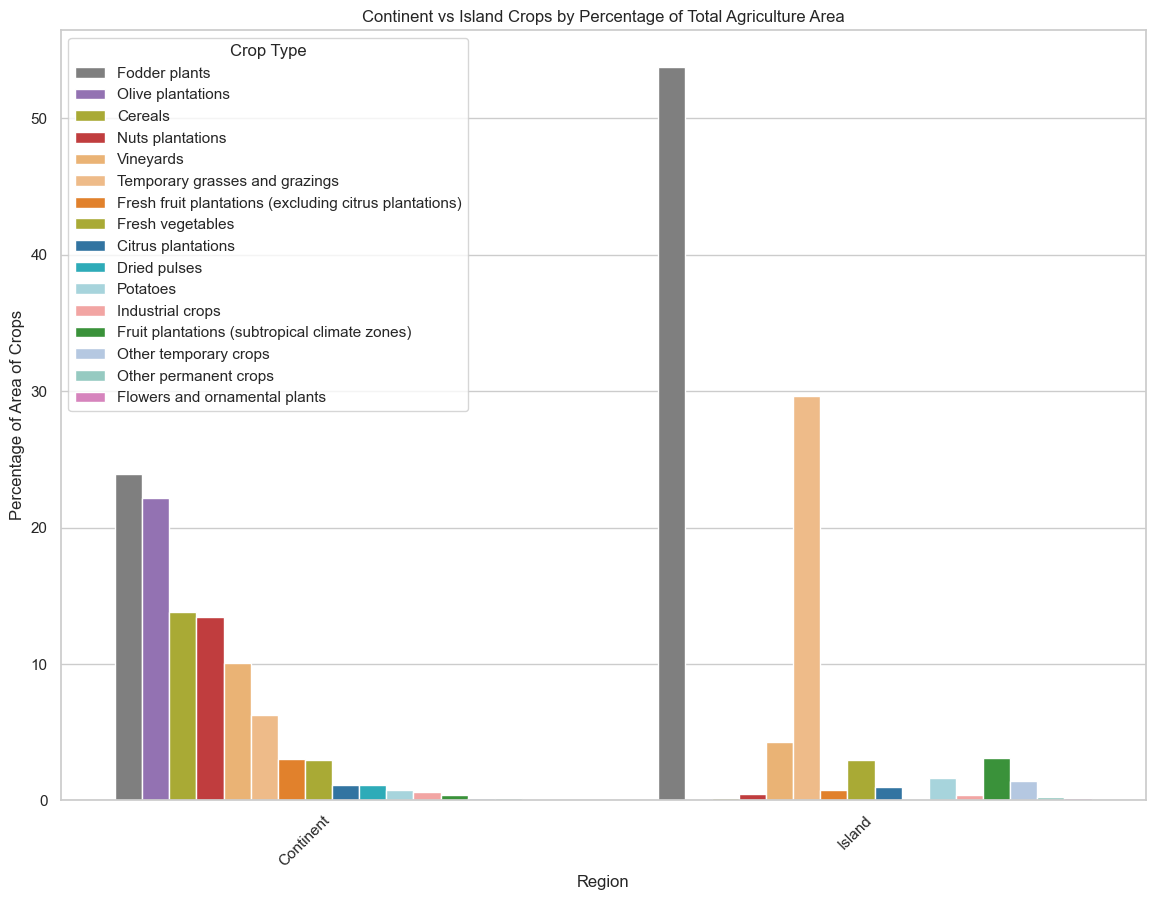

In [31]:
# Compare continents vs islands
crops_cont_island_sorted = crops_cont_island.sort_values(by='area', ascending=False)

# Set style
sns.set(style="whitegrid")

# Create a bar plot for each region
plt.figure(figsize=(14, 10))
bar_plot = sns.barplot(x='region', y='area_perc', hue='crop_name', data=crops_cont_island_sorted, palette=production_colors)

# Labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel('Region')
plt.ylabel('Percentage of Area of Crops')
plt.title('Continent vs Island Crops by Percentage of Total Agriculture Area')
plt.legend(title='Crop Type', bbox_to_anchor=(0, 1), loc='upper left')

# Show plot
plt.show()

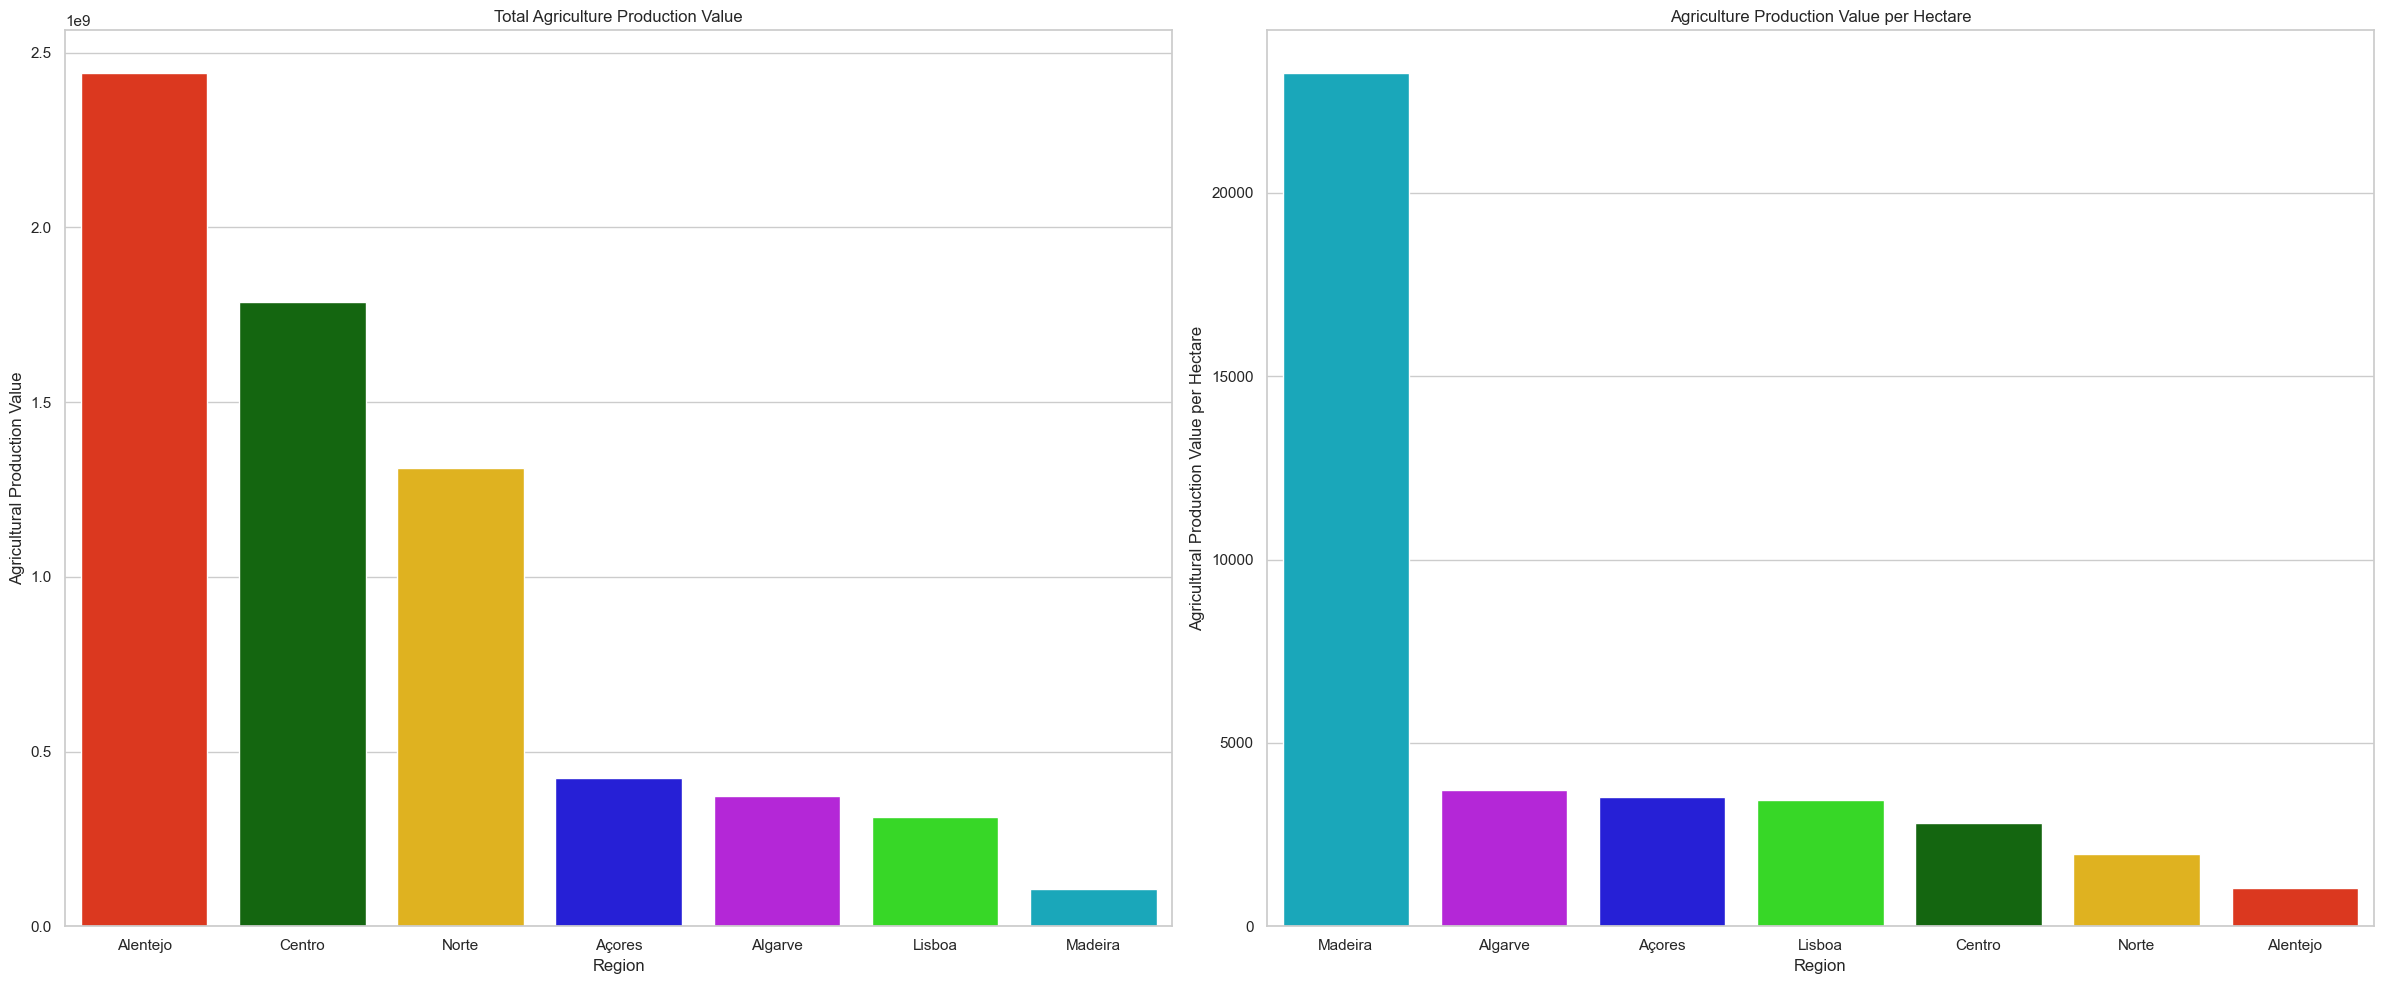

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# bar plot of total agricultural production value in each region
prod_total_ordered = prod_df.sort_values(by='p.value_eur', ascending=False)
bar_plot = sns.barplot(x='region_name', y='p.value_eur', hue='region_name', data=prod_total_ordered, palette=region_colors, ax=axs[0])
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Agricultural Production Value')
axs[0].set_title('Total Agriculture Production Value')

# bar plot of agricultural production value by ha in each region
prod_area_value_ordered = prod_df.sort_values(by='p.area_ha', ascending=False)
bar_plot = sns.barplot(x='region_name', y='p.area_ha', hue='region_name', data=prod_area_value_ordered, palette=region_colors, ax=axs[1])
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Agricultural Production Value per Hectare')
axs[1].set_title('Agriculture Production Value per Hectare')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [33]:
prod_area_value_ordered.head(10)

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
6,30,Madeira,2,2019,107140853,23269.4
1,15,Algarve,2,2019,373196278,3709.5
5,20,Açores,2,2019,423978604,3514.6
3,17,Lisboa,2,2019,313163976,3451.5
2,16,Centro,2,2019,1786415564,2820.8
0,11,Norte,2,2019,1312536063,1978.7
4,18,Alentejo,2,2019,2441935279,1038.8
